# Introduction to LSAPy

`lsapy` stands for Land Suitability Analysis (LSA) for Python. The package has been designed to perfom spatial and temporal LSA operating on [xarray](https://docs.xarray.dev/en/stable/) `DataArray` and `Dataset`. It provides three module: `SuitabilityFunction`, `SuitabilityCriteria` and `LandSuitability` that operate toghether to perform LSA. This notebook aims to describe them and explain how they should be used and combine. 

## Suitability Function

Suitability fuctions are used to convert indicator to suitability values. `lsapy` support two types of suitability function: discrete function (`DiscreteSuitFunction`) and membership function (`MembershipSuitFunction`), both embedded in `SuitabilityFunction`.

Let's start by importing the functions !

In [1]:
# import libraries
from lsapy.functions import DiscreteSuitFunction, MembershipSuitFunction, SuitabilityFunction

### Discrete Suitability Function

The simplest case! Discrete function is use to convert discrete indicator values to suitability. Thus, the computation is quite straight forward and we simply attribute a suitability value to each discrete value. This is done by providing the rules as parameters of the function and where rules is a `dict` with the indicator value as key and the associated suitability as value.  
Below is an example:

In [4]:
x = [1,2,3,4,5] # discrete indicator values
rules = {1:0, 2:0, 3:0.2, 4:0.6, 5:1} # suitability values

func = DiscreteSuitFunction(func_params={'rules':rules}) # initialize the function
func(x)

array([0. , 0. , 0.2, 0.6, 1. ], dtype=float32)

`DiscreteSuitFunction` also support `str` indicators values.

In [9]:
x = ['1','2','3','4','5'] # discrete indicator values
rules = {'1':0, '2':0, '3':0.2, '4':0.6, '5':1} # suitability values

func = DiscreteSuitFunction(func_params={'rules':rules}) # initialize the function
func(x)

array([0. , 0. , 0.2, 0.6, 1. ], dtype=float32)

### Membership Suitability Function

Membership functions are a bit more complex and are used to convert continuous indicators to suitability. Several functions are available in `MembershipSuitFunction` allowing flexibility in the shape of the curve. The first step is thus to determine which function we should use and with which parameters and `MembershipSuitFunction.fit` method can help in that way.

Let's say we have indicator value ranging from 750 to 2000 and we know that suitability values of 0, 0.25, 0.5, 0.75, 1 correspond respectivaly to 1000, 1150, 1250, 1350, 1500. We can use this information to fit membership functions and determine which one it the best.

In [11]:
MembershipSuitFunction.fit(x=[1000,1150,1250,1350,1500], y=[0,0.25,0.5,0.75,1])


Best fit: vetharaniam2022_eq5
RMSE: 0.03187
Params: a=-0.875896889227584, b=1248.439341046477



(<function lsapy.functions.logistic_vetharaniam2022_eq5(x, a, b)>,
 array([-8.75896889e-01,  1.24843934e+03]))

The result of the fit says that best membership function is 'vetharaniam2022_eq5' with the parameters a=-0.876 and b=1248.  
We can also plot the results of the fitting for a better understanding.

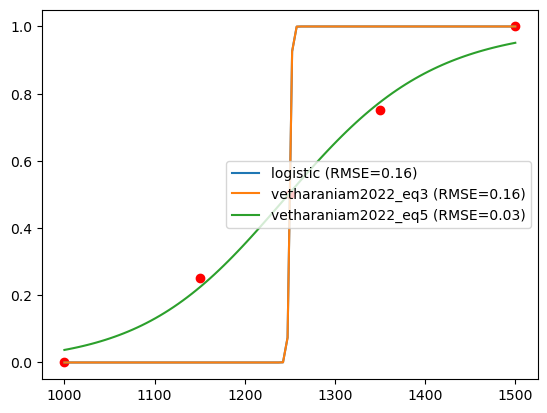


Best fit: vetharaniam2022_eq5
RMSE: 0.03187
Params: a=-0.875896889227584, b=1248.439341046477



(<function lsapy.functions.logistic_vetharaniam2022_eq5(x, a, b)>,
 array([-8.75896889e-01,  1.24843934e+03]))

In [12]:
MembershipSuitFunction.fit(x=[1000,1150,1250,1350,1500], y=[0,0.25,0.5,0.75,1], plot=True)

We can know use the results of the fitting to convert indicator value into suitability.

In [14]:
import numpy as np

func = MembershipSuitFunction(func_method='vetharaniam2022_eq5', func_params={'a':-0.876, 'b':1248})
x = np.linspace(750, 2000, 100) # indicator values: create a array of 100 values between 750 and 2000
func(x)

array([9.51763219e-04, 1.16351351e-03, 1.41995462e-03, 1.73002204e-03,
       2.10433617e-03, 2.55549809e-03, 3.09843185e-03, 3.75077893e-03,
       4.53335084e-03, 5.47064528e-03, 6.59143118e-03, 7.92940633e-03,
       9.52392964e-03, 1.14208266e-02, 1.36732623e-02, 1.63426683e-02,
       1.94997030e-02, 2.32252088e-02, 2.76111167e-02, 3.27612262e-02,
       3.87917639e-02, 4.58315947e-02, 5.40219283e-02, 6.35153298e-02,
       7.44738175e-02, 8.70658115e-02, 1.01461706e-01, 1.17827874e-01,
       1.36318996e-01, 1.57068765e-01, 1.80179198e-01, 2.05709100e-01,
       2.33662485e-01, 2.63978079e-01, 2.96521234e-01, 3.31079649e-01,
       3.67364089e-01, 4.05014912e-01, 4.43614498e-01, 4.82704891e-01,
       5.21809179e-01, 5.60454541e-01, 5.98194622e-01, 6.34629046e-01,
       6.69418383e-01, 7.02293584e-01, 7.33059720e-01, 7.61594552e-01,
       7.87842925e-01, 8.11808271e-01, 8.33542475e-01, 8.53135247e-01,
       8.70703871e-01, 8.86383941e-01, 9.00321423e-01, 9.12666175e-01,
      

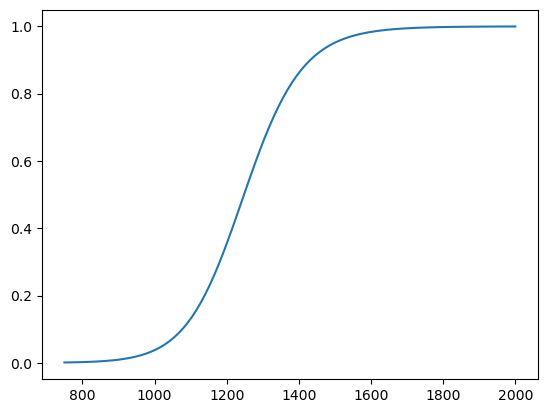

In [15]:
func.plot(x)

### Suitability Function

`DiscreteSuitFunction` and `MembershipSuitFunction` are encompassed in `SuitabilityFunction`, so the latter can be used for all type of membership function.  

For example with discrete function:

In [ ]:
func = DiscreteSuitFunction(func_params={'rules':{'1':0, '2':0, '3':0.2, '4':0.6, '5':1}})
func(['1','2','3','4','5'])


array([0. , 0. , 0.2, 0.6, 1. ], dtype=float32)

is equivalent to:

In [18]:
func = SuitabilityFunction(func_method='discrete', func_params={'rules':{'1':0, '2':0, '3':0.2, '4':0.6, '5':1}})
func(['1','2','3','4','5'])

array([0. , 0. , 0.2, 0.6, 1. ], dtype=float32)

## Suitability Criteria

`SuitabilityCriteria` is used to defined a criteria, set its associated indicator, and described how its suitability is computed. It has the following attributes:
- name: criteria name
- indicator: input data to compute suitability
- func (`DiscreteSuitFunction`, `MembershipSuitFunction`, or `SuitabilityFunction`): suitability function to use
- weight (default=1): criteria weight used when computing land suitability
- category (optional): criteria category allwoing to compute land suitability for different category (e.g., climate, soil...)
- long_name: criteria long name
- description: description of the criteria

Here is a simple example with sample data included in the package:

In [5]:
import numpy as np
from lsapy import SuitabilityFunction, SuitabilityCriteria
from lsapy.utils import load_soil_data

soil_data = load_soil_data()

sc = SuitabilityCriteria(
    name = 'potential_root_depth',
    long_name='Potential Rooting Depth Suitability',
    indicator= soil_data['PRD'], # indicator as xr.DataArray
    func = SuitabilityFunction(func_method='vetharaniam2022_eq5', func_params={'a': -11.98, 'b': 0.459})
)

We can now compute the suitability of the criteria and plot the result.

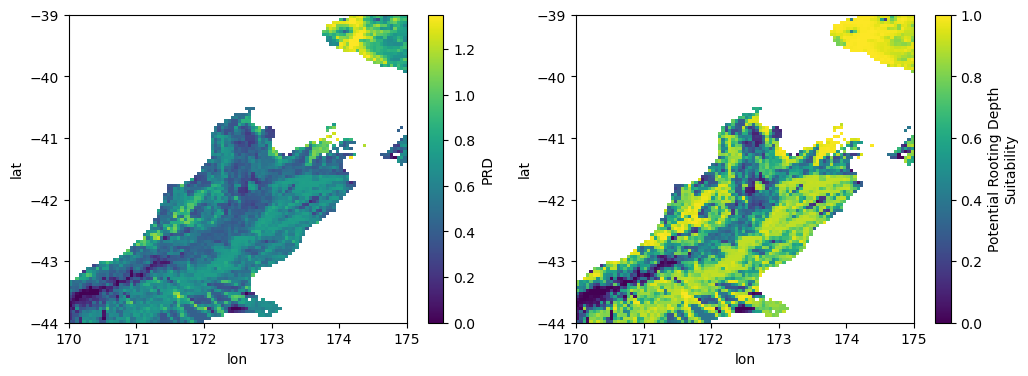

In [13]:
import matplotlib.pyplot as plt

prd = sc.compute()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
soil_data['PRD'].plot(ax=ax[0])
prd.plot(ax=ax[1], vmin=0, vmax=1)
plt.show()


Let's see another example with climate data. We use `xclim` package to calculate the total annual precipition and provide this latter as criteria indicator.

In [16]:
from xclim.indicators.atmos import precip_accumulation
from lsapy.utils import load_climate_data

clim_data = load_climate_data()

pr_tot = precip_accumulation(clim_data['pr'], freq='YS') # YS: Year Start frequency

sc = SuitabilityCriteria(
    name = 'water_requirements',
    long_name='Annual Rainfall Requirement Suitability',
    indicator= pr_tot,
    func = SuitabilityFunction(func_method='vetharaniam2022_eq5', func_params={'a': 0.876, 'b': 1248})
)

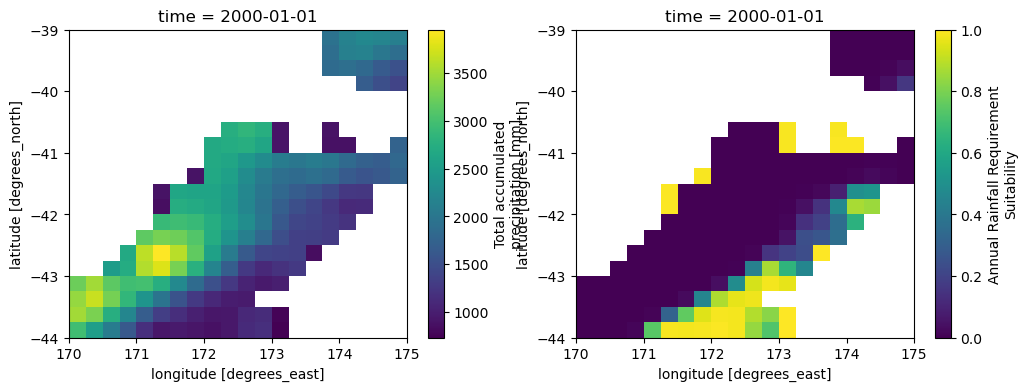

In [17]:
water_req = sc.compute()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
pr_tot.isel(time=0).plot(ax=ax[0])
water_req.isel(time=0).plot(ax=ax[1], vmin=0, vmax=1)
plt.show()

## Land Suitability

Great, we are now ready to perform our first LSA ! To do so, we use `LandSuitability` that allows to compute the overall suitability of several criteria and that has the following attributes:
- name: LSA name
- criteria: `dict` of `SuitabilityCriteria`
- short_name (optional): LSA short name
- long_name (optional): LSA long name
- description (optional): LSA description

First we have to define the criteria. Here, we use three criteria: the potential rooting depth and water requirement already used above and a third one corresponding to the soil draingage class (discrete). We are going to split criteria in two categories, soil and climate, and change the weight of each of them.

In [ ]:
from xclim.indicators.atmos import precip_accumulation
from lsapy import LandSuitability, SuitabilityCriteria
from lsapy.utils import load_soil_data, load_climate_data

soil_data = load_soil_data()
clim_data = load_climate_data().interp_like(soil_data, method='nearest') # resample climate data to soil data resolution

ls = LandSuitability(
    name = 'first_lsa',
    long_name='My First Land Suitability Analysis',
    criteria = {
        'potential_root_depth': SuitabilityCriteria(
            name = 'potential_root_depth',
            long_name='Potential Rooting Depth Suitability',
            weight=2,
            category='soil',
            indicator= soil_data['PRD'], # indicator as xr.DataArray
            func = SuitabilityFunction(func_method='vetharaniam2022_eq5', func_params={'a': -11.98, 'b': 0.459})),
        'drainage_class': SuitabilityCriteria(
            name = 'drainage_class',
            weight=1,
            category='soil',
            long_name='Drainage Class Suitability',
            indicator= soil_data['DRC'],
            func = SuitabilityFunction(func_method='discrete', func_params={'rules': {'1': 0, '2': 0.1, '3': 0.5, '4': 0.9, '5': 1}})),
        'water_requirements': SuitabilityCriteria(
            name = 'water_requirements',
            weight=0.5,
            category='climate',
            long_name='Annual Rainfall Requirement Suitability',
            indicator= precip_accumulation(clim_data['pr'], freq='YS'), # indicator as xr.DataArray
            func = SuitabilityFunction(func_method='vetharaniam2022_eq5', func_params={'a': 0.876, 'b': 1248}))
    }
)

Then, we can compute the suitability starting with the criteria.

In [35]:
ls.compute_criteria_suitability(inplace=True)
ls.data

Computing potential_root_depth...
Computing drainage_class...
Computing water_requirements...


<xarray.Dataset> Size: 922kB
Dimensions:               (lon: 100, lat: 100, time: 10)
Coordinates:
  * lon                   (lon) float64 800B 170.0 170.1 170.1 ... 174.9 175.0
  * lat                   (lat) float64 800B -43.98 -43.92 ... -39.08 -39.02
  * time                  (time) datetime64[ns] 80B 2000-01-01 ... 2009-01-01
Data variables:
    potential_root_depth  (lat, lon) float64 80kB 0.2833 0.2076 ... 0.9426
    drainage_class        (lat, lon) float32 40kB 1.0 nan 1.0 ... 1.0 1.0 0.9
    water_requirements    (time, lat, lon) float64 800kB nan nan nan ... nan nan
Attributes:
    name:       first_lsa
    criteria:   ['potential_root_depth', 'drainage_class', 'water_requirements']
    long_name:  My First Land Suitability Analysis

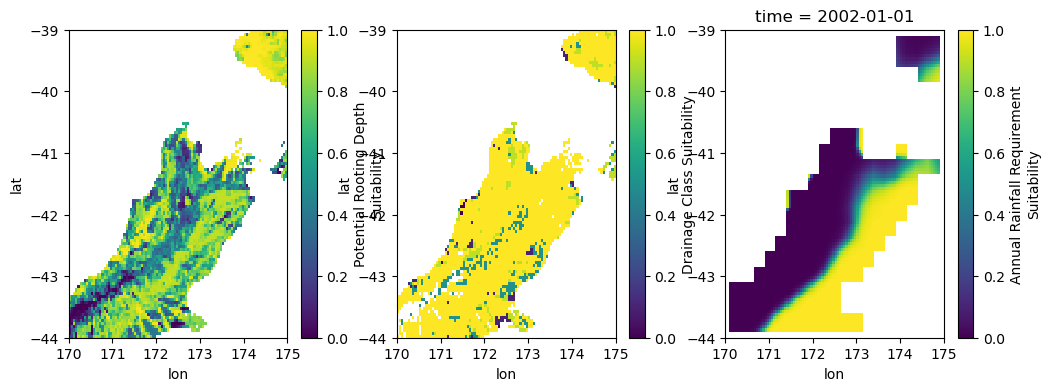

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ls.data['potential_root_depth'].plot(ax=ax[0], vmin=0, vmax=1)
ls.data['drainage_class'].plot(ax=ax[1], vmin=0, vmax=1)
ls.data['water_requirements'].isel(time=2).plot(ax=ax[2], vmin=0, vmax=1)
plt.show()

Now, we can compute the suitability of categories. There are several method implemanted to aggregate criteria (e.g., mean, weighted mean, geometric mean, weighted geometric mean, and limiting factor). Here, we are going to use a simple weighted mean.

In [37]:
ls.compute_category_suitability(method= 'weighted_mean', keep_criteria=True, inplace=True)
ls.data

Computing soil...
Computing climate...


<xarray.Dataset> Size: 2MB
Dimensions:               (lon: 100, lat: 100, time: 10)
Coordinates:
  * lon                   (lon) float64 800B 170.0 170.1 170.1 ... 174.9 175.0
  * lat                   (lat) float64 800B -43.98 -43.92 ... -39.08 -39.02
  * time                  (time) datetime64[ns] 80B 2000-01-01 ... 2009-01-01
Data variables:
    potential_root_depth  (lat, lon) float64 80kB 0.2833 0.2076 ... 0.9426
    drainage_class        (lat, lon) float32 40kB 1.0 nan 1.0 ... 1.0 1.0 0.9
    water_requirements    (time, lat, lon) float64 800kB nan nan nan ... nan nan
    soil                  (lat, lon) float64 80kB 0.5222 nan ... 0.9593 0.9284
    climate               (time, lat, lon) float64 800kB nan nan nan ... nan nan
Attributes:
    name:       first_lsa
    criteria:   ['potential_root_depth', 'drainage_class', 'water_requirements']
    long_name:  My First Land Suitability Analysis

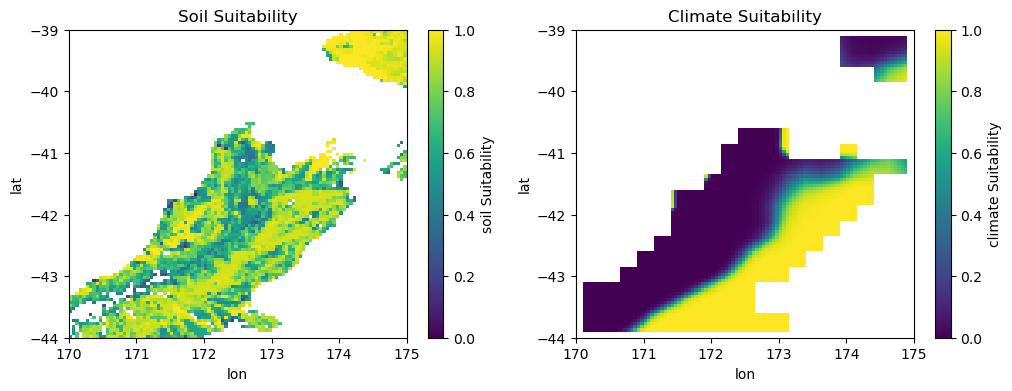

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ls.data['soil'].plot(ax=ax[0], vmin=0, vmax=1)
ax[0].set_title('Soil Suitability')
ls.data['climate'].isel(time=2).plot(ax=ax[1], vmin=0, vmax=1)
ax[1].set_title('Climate Suitability')
plt.show()

Finally, we can compute the overall suitability.

In [40]:
ls.compute_suitability(method= 'weighted_mean', by_category=True, inplace=True, keep_all=True)
ls.data

Computing suitability...


<xarray.Dataset> Size: 3MB
Dimensions:               (lon: 100, lat: 100, time: 10)
Coordinates:
  * lon                   (lon) float64 800B 170.0 170.1 170.1 ... 174.9 175.0
  * lat                   (lat) float64 800B -43.98 -43.92 ... -39.08 -39.02
  * time                  (time) datetime64[ns] 80B 2000-01-01 ... 2009-01-01
Data variables:
    potential_root_depth  (lat, lon) float64 80kB 0.2833 0.2076 ... 0.9426
    drainage_class        (lat, lon) float32 40kB 1.0 nan 1.0 ... 1.0 1.0 0.9
    water_requirements    (time, lat, lon) float64 800kB nan nan nan ... nan nan
    soil                  (lat, lon) float64 80kB 0.5222 nan ... 0.9593 0.9284
    climate               (time, lat, lon) float64 800kB nan nan nan ... nan nan
    suitability           (lat, lon, time) float64 800kB nan nan nan ... nan nan
Attributes:
    name:       first_lsa
    criteria:   ['potential_root_depth', 'drainage_class', 'water_requirements']
    long_name:  My First Land Suitability Analysis

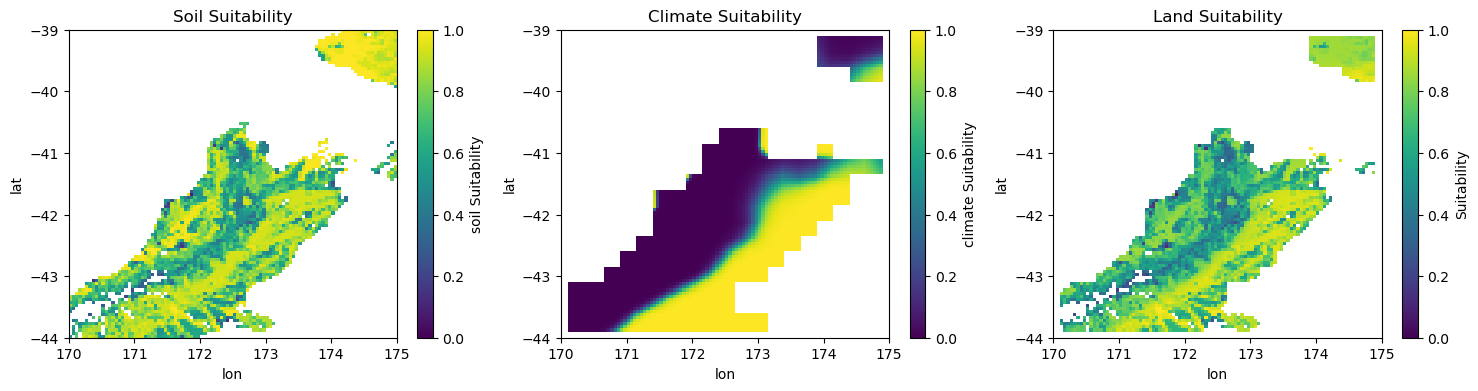

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
ls.data['soil'].plot(ax=ax[0], vmin=0, vmax=1)
ax[0].set_title('Soil Suitability')
ls.data['climate'].isel(time=2).plot(ax=ax[1], vmin=0, vmax=1)
ax[1].set_title('Climate Suitability')
ls.data['suitability'].isel(time=2).plot(ax=ax[2], vmin=0, vmax=1)
ax[2].set_title('Land Suitability')
plt.show()

Congrats, you've just finished your for LSA !